# Setup the project for custom training

In [1]:
def setup_project():
    !pip install openai-clip
    !git clone https://github.com/ararchieves/Height-clipseg.git
    %cd 'Height-clipseg'

    from IPython.display import clear_output

    clear_output()
    print("Setup complete!")

In [2]:
SETUP = False # Change to true if running for the first time

In [3]:
if SETUP: setup_project()

Setup complete!


## Start Modifying the training.py

### Imports

In [199]:
import os

import torch
import torchvision
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from datasets.dfc_dataset import DFCDataset
from models.clipseg import CLIPDensePredT

### Helper Functions

# Training Loop

In [185]:
## Config
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

BATCH_SIZE=32
EPOCHS = 50
LEARNING_RATE = 0.001

In [186]:
# load the dataloader
dataset = DFCDataset()
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)

In [188]:
## INIT the model and training elements
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=32, complex_trans_conv=True)
model = model.to(DEVICE)

In [189]:
opt = optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss_fn = nn.MSELoss()

In [190]:
for epoch in range(EPOCHS):
    for i, (view, mask) in tqdm(enumerate(dataloader), total=len(dataloader), desc=f"{epoch+1}/{EPOCHS}"):
        elem_in_batch = view.shape[0]

        view = view.to(DEVICE)

        mask = mask.to(DEVICE).to(torch.float32)
        cond = ["Objects taller than 9 meters"] * elem_in_batch

        # Training and Backpropagation
        opt.zero_grad()

        pred = model(view, cond)[0]

        loss = loss_fn(pred, mask)


        loss.backward()
        opt.step()

    print("Loss: ", loss.item())

1/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  16104.5908203125


2/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13928.2275390625


3/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13719.3447265625


4/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13658.658203125


5/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13602.8154296875


6/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13663.2958984375


7/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13578.0


8/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13574.8408203125


9/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13570.8994140625


10/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13560.8203125


11/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13556.349609375


12/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13545.15625


13/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13541.26953125


14/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13537.87109375


15/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13541.6171875


16/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13523.240234375


17/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13523.5390625


18/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13528.6962890625


19/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13517.2119140625


20/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13511.78125


21/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13511.615234375


22/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  13291.0390625


23/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  11219.705078125


24/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9419.033203125


25/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9130.322265625


26/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9332.6640625


27/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9615.396484375


28/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9244.328125


29/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9108.271484375


30/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9172.982421875


31/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8910.2783203125


32/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  9170.8359375


33/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8736.705078125


34/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8482.142578125


35/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8291.0185546875


36/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8356.2314453125


37/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8067.52001953125


38/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  8152.6669921875


39/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7996.75146484375


40/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7875.28125


41/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7747.20458984375


42/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7631.982421875


43/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7510.84130859375


44/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7392.0458984375


45/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7374.29296875


46/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7225.47265625


47/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7137.8935546875


48/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7036.8955078125


49/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  7033.62890625


50/50:   0%|          | 0/9 [00:00<?, ?it/s]

Loss:  6948.029296875


In [191]:
image, mask = next(iter(dataloader))

In [192]:
image = image.to(DEVICE)

In [193]:
image.shape

torch.Size([32, 3, 256, 256])

In [194]:
with torch.no_grad():
    pred = model(image, ["Objects taller than 9 meters"] * image.shape[0])[0]

In [195]:
image = image.cpu()
pred = pred.cpu()

In [196]:
pred[0].shape

torch.Size([1, 256, 256])

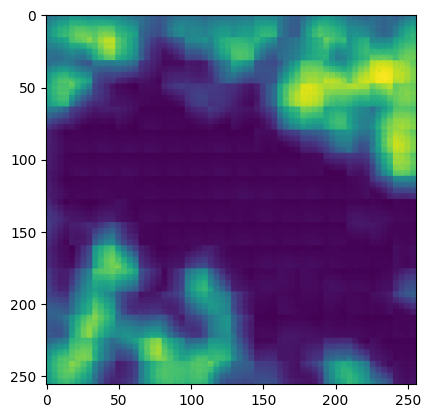

In [197]:
plt.imshow(pred[0].permute(1,2,0))

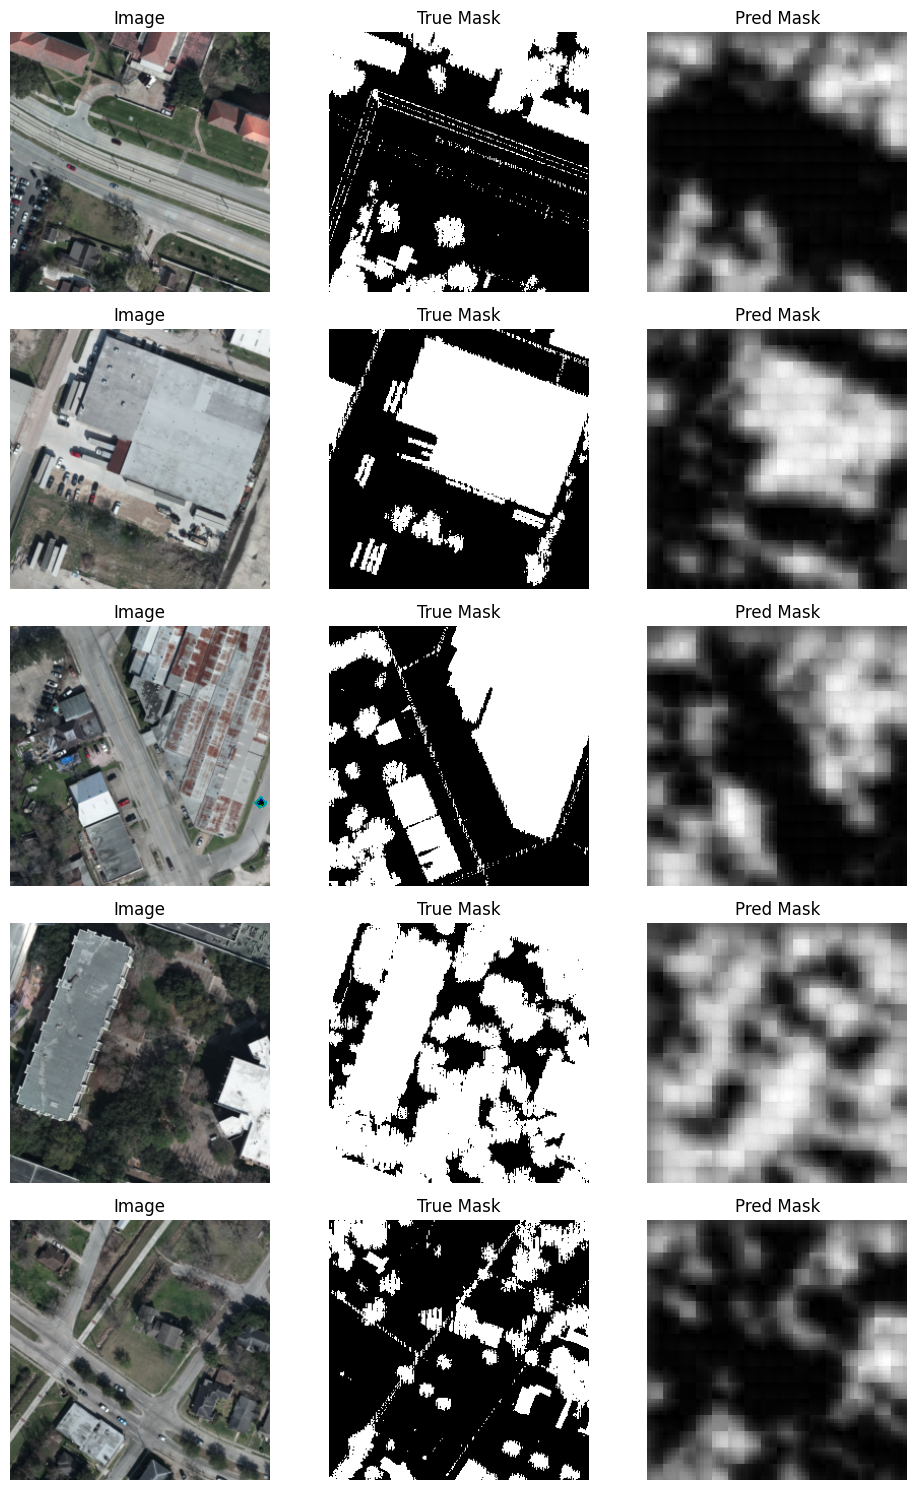

In [198]:
num_samples = 5

fig, axes = plt.subplots(num_samples, 3, figsize=(10, 15))

for i in range(num_samples):
    # Display original image
    axes[i, 0].imshow(image[i].permute(1, 2, 0))
    axes[i, 0].set_title("Image")

    # Display true mask
    axes[i, 1].imshow(mask[i].squeeze(), cmap='gray')
    axes[i, 1].set_title("True Mask")

    # Display predicted mask
    axes[i, 2].imshow(pred[i].squeeze(), cmap='gray')
    axes[i, 2].set_title("Pred Mask")

    # Remove axes ticks
    for ax in axes[i]:
        ax.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()